In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import time
from IPython import display
import numpy as np
import numpy.linalg as LA
%matplotlib inline

In [2]:
df = pd.read_csv("Diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
sum(df['Outcome'])/df.shape[0]

0.3489583333333333

In [7]:
data = df.to_numpy()
(n,d) = data.shape
X = data[:,0:d-2]
Y = data[:,d-1]

In [8]:
# Standadize the data
(n,d) = X.shape
for i in range(d):
    mean = np.mean(X[:,i])
    std = np.std(X[:,i])
    X[:,i] = (X[:,i]-mean)/std

In [9]:
# Covarience matrix
S = (np.transpose(X)@X)/n

In [10]:
S

array([[ 1.        ,  0.12945867,  0.14128198, -0.08167177, -0.07353461,
         0.01768309, -0.03352267],
       [ 0.12945867,  1.        ,  0.15258959,  0.05732789,  0.33135711,
         0.22107107,  0.1373373 ],
       [ 0.14128198,  0.15258959,  1.        ,  0.20737054,  0.08893338,
         0.28180529,  0.04126495],
       [-0.08167177,  0.05732789,  0.20737054,  1.        ,  0.43678257,
         0.3925732 ,  0.18392757],
       [-0.07353461,  0.33135711,  0.08893338,  0.43678257,  1.        ,
         0.19785906,  0.18507093],
       [ 0.01768309,  0.22107107,  0.28180529,  0.3925732 ,  0.19785906,
         1.        ,  0.14064695],
       [-0.03352267,  0.1373373 ,  0.04126495,  0.18392757,  0.18507093,
         0.14064695,  1.        ]])

In [11]:
eigenValues, eigenVectors = LA.eig(S)

idx = eigenValues.argsort()[::-1] # eigenValues in decreasing order
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [12]:
eigenValues[:4]

array([2.06818612, 1.20597249, 1.01657837, 0.86940269])

In [13]:
# Largest two eigen values
V = eigenVectors[:,0:2]
X_R = X@V
X_R.shape

(768, 2)

In [14]:
np.mean(X_R,axis = 0)

array([ 2.45752492e-16, -7.58941521e-17])

In [15]:
np.var(X_R,axis = 0)

array([2.06818612, 1.20597249])

In [16]:
def plot_graph(X,Y):
    df = pd.DataFrame(X,columns = ['X1','X2'])
    df['Label'] = Y  
    sns.relplot(data = df,x = "X1",y = "X2",hue = 'Label')

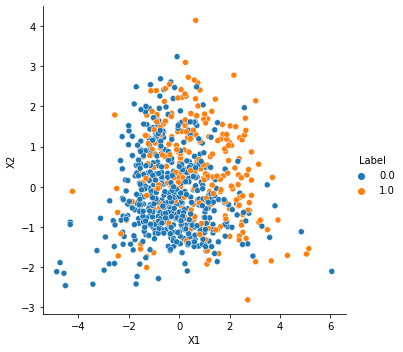

In [17]:
plot_graph(X_R,Y)

In [18]:
Y.shape

(768,)

In [19]:
(n,d) = X_R.shape

In [20]:
n_train = int(0.8*n)
n_test = int(0.2*n)
temp = np.hstack((X_R,Y.reshape(-1,1)))
np.random.shuffle(temp)
x_train = temp[:n_train,0:d]
y_train = temp[:n_train,d]
x_test = temp[n_train:,0:d]
y_test = temp[n_train:,d]

In [21]:
x_train.shape

(614, 2)

In [22]:
sum(y_train)/n_train

0.36156351791530944

In [23]:
sum(y_test)/n_test

0.3006535947712418

In [25]:
def regression_inverse(x,y):
    xT = x.transpose()
    w = np.linalg.inv(xT @ x) @ xT @ y
    return w

In [39]:
w = regression_inverse(x_train,y_train)
w

array([0.12098198, 0.08541879])

In [40]:
def test_accuracy(x,y,w):
    (n,d) = x.shape
    pred = n - (np.logical_xor((x @ w) > 0, y>0).sum())
    return (pred/n) * 100

In [41]:
test_accuracy(x_train,y_train,w)

67.58957654723126

In [42]:
test_accuracy(x_test,y_test,w)

67.53246753246754

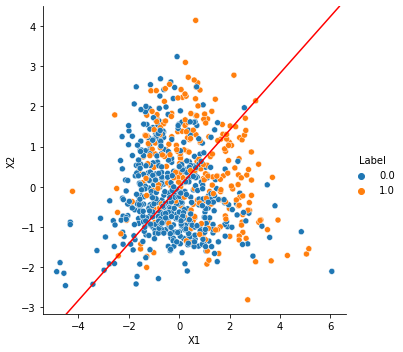

In [48]:
plot_graph(X_R,Y)
plt.axline(xy1=(0, 0), xy2=w, color='r')

In [83]:
Y.shape

(1, 768)

In [84]:
df1 = pd.DataFrame(X_R,columns = ['x1','x2'])
df1['y'] = Y.reshape(-1,1)
df1

,x1,x2,y
0,0.708054,0.631703,1.0
1,-0.951638,-0.979558,0.0
2,-0.686428,1.608650,1.0
3,-0.776792,-0.903345,0.0
4,2.719940,-2.809888,1.0
...,...,...,...
763,0.978630,0.846991,0.0
764,0.062059,-0.154436,0.0
765,-0.275830,0.277411,0.0
766,-1.291857,-0.215336,1.0


In [85]:
def fun(x):
    return x["x1"]*x["x2"]
def fun1(x):
    return (x["x1"]*x["x2"])**2
def fun2(x):
    return np.exp(x["x1"]*x["x2"])
def fun3(x):
    return (x["x1"]*x["x2"])**3

df1['x3'] = df1['x1'].apply(lambda x: x*x)
df1['x4'] = df1['x2'].apply(lambda x: x*x)
df1['x5'] = df1.apply(lambda x: fun(x),axis = 1)
df1['x6'] = df1.apply(lambda x: fun1(x),axis = 1)
df1['x7'] = df1.apply(lambda x: fun2(x),axis = 1)